In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
city_data_df = pd.read_csv("city_data.csv")
ride_data_df = pd.read_csv("ride_data.csv")
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
alldata_df = pd.merge(ride_data_df, city_data_df, on="city", how="outer")
alldata_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
#sorted([[x, y] for x, y in zip(cities, city_fare)], key=lambda x: x[0])
#urban_df = alldata_df["type"]

In [6]:
#avg_fare = alldata_df.groupby("city")['fare'].mean()
#avg_fare["Matthewside"]

In [7]:
#city_type = alldata_df.groupby("type")["city"]
#city_type.value_counts()

In [20]:
#get all names of cities
cities = alldata_df["city"].unique()

#calculate city data for total rides, average fares, and total drivers
city_rides = alldata_df.groupby("city")["ride_id"].count()
city_fare = alldata_df.groupby("city")["fare"].mean()
city_drivers = alldata_df.groupby("city")["driver_count"].first()

#make dictionary to change to dataframe
city_type = alldata_df.groupby("city")["type"].first()

city_dict = {"city_rides": city_rides,
             "city_fare": city_fare,
             "city_drivers": city_drivers,
             "city_type" : city_type}

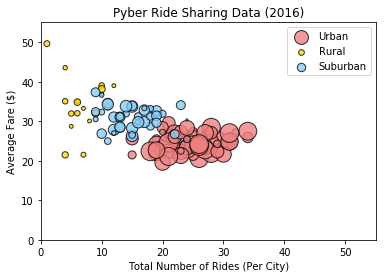

In [33]:
city_df = pd.DataFrame(city_dict)

#group city_data by city type    
new_city = city_df.groupby("city_type")
plt.scatter(new_city.get_group("Urban")["city_rides"], new_city.get_group("Urban")["city_fare"], 
            c='#f08080', alpha = 0.8, edgecolor='black', s=new_city.get_group("Urban")["city_drivers"]*5, label="Urban")
plt.scatter(new_city.get_group("Rural")["city_rides"], new_city.get_group("Rural")["city_fare"], 
            c='gold', alpha = 0.8, edgecolor='black', s=new_city.get_group("Rural")["city_drivers"]*5, label="Rural")
plt.scatter(new_city.get_group("Suburban")["city_rides"], new_city.get_group("Suburban")["city_fare"], 
            c='#87cefa', alpha = 0.8, edgecolor='black', s=new_city.get_group("Suburban")["city_drivers"]*5, label="Suburban")

#set title, axis labels, axis values, and legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.axis([0,55,0,55])
plt.legend(loc="best")

None
plt.show()

#Alternate way:
#loop through cities to get fare averages, rides, drivers, and type of city by city
#city_fare = []
#city_rides = []
#city_drivers = []
#city_type = []
#for city in cities:
#city_fare.append(alldata_df.loc[alldata_df["city"]==city, "fare"].mean())
#city_rides.append(alldata_df.loc[alldata_df["city"]==city, "city"].value_counts())
#city_drivers.append(alldata_df.loc[alldata_df["city"]==city,"driver_count"].iloc[0])
#city_type.append(alldata_df.loc[alldata_df["city"]==city, "type"].iloc[0])
#set colors to correspond to city types
#alternate way ---> colors = {"Urban": "Orange", "Suburban":"Yellow", "Rural":"Green"}
#alt (cont) ---> new_color = [colors[ctype] for ctype in city_type]

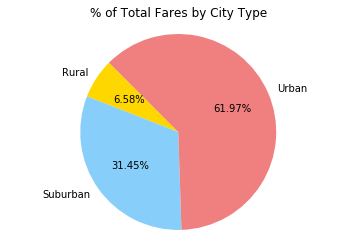

In [60]:
# get the percent fare by city type
fare_type = (alldata_df.groupby("type")['fare'].sum())

#set labels and colors
pie_labels = ["Rural", "Suburban", "Urban"]
pie_colors = ['gold','#87cefa','#f08080']

#make pie chart, equal so it's more representative, percents to 2 decimal places
#did not explode or use shadow, less is more

plt.pie(fare_type, autopct='%.2f%%', labels=pie_labels, colors=pie_colors, shadow=False, explode=None, startangle=135)
plt.title("% of Total Fares by City Type")
plt.axis("equal")
None
plt.show()

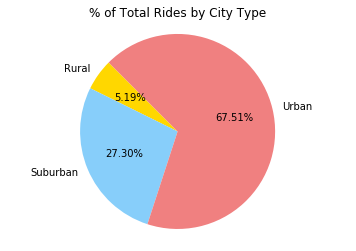

In [59]:
# get the percent rides by city type

#may have to use .agg
ride_type = (alldata_df.groupby("type")['ride_id'].count())

#make pie chart, equal so it's more representative, percents to 2 decimal places
#did not explode or use shadow, less is more

plt.pie(ride_type, autopct='%.2f%%', labels=pie_labels, colors=pie_colors, shadow=False, explode=None, startangle=135)
plt.title("% of Total Rides by City Type")
plt.axis("equal")
None
plt.show()

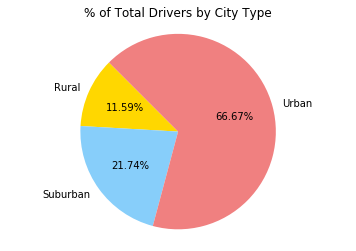

In [57]:
# get the percent fare by city type
driver_type = (alldata_df.groupby("type")['driver_count'].first())

#make pie chart, equal so it's more representative, percents to 2 decimal places
#did not explode or use shadow, less is more
plt.pie(driver_type, autopct='%.2f%%', labels=pie_labels, colors=pie_colors, shadow=False, explode=None, startangle=135)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")
None
plt.show()

Three oberservable trends:

1) The data for the percentage of drivers, fares, and fares seems proportional to the type of city with Urban having the highest percentage and Rural having the smallest. This could be due to the population density of the different city types and would take some calculations to account for the different densities if we want to compare further (right now it's like comparing apples to oranges). Additionally, the same number of ride data could be collected for each city type - but that may not be representative so many collecting the data over the same time period/frame and adjusting for population density would be ideal.

2) The scatter seems to have a slight downward trend which could be due to the fact that there is the most data for urban, less for suburban and least for rural rides. Additionally, cost of operation in more rural areas could be higher, the demand may be lower, and trips may be longer distances. Further investigation is needed.

3) The average fares by city type seem to indicate that is is most expensive in Rural, less in Suburban, and least in Urban ares on average. A correlation may be made that in places with more total rides, the average fares are lower. This could be due to a variety of reasons (like some discussed in #2), and correlation may not mean causation. 